### Objective 

 - We will predict employee salaries from different employee characteristics (or features using one-hot encoding and multiple regression

### ----------------------------------------------------------------------------------------------------

### Content

#### 1. Data Preprocessing
    - Data cleaning
    
#### 2. Exploratory data analysis (EDA)
    - Gain  understanding of the data set/s by summarizing their main characteristics
    using plots to visualise them.
    
#### 3. Feature engineering 
    - constructing relevant features from existing data to train a machine learning
    model.
    
#### 4. Model development

#### 5. Predictions

#### 6. Insights

### --------------------------------------------------------------------------------------------

### 1. Data Preprocessing

- Technique that involves transforming raw data into an understandable format

In [1]:
import pandas as pd

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

# Import the data-set
salary  = pd.read_csv('../data/salary.csv')
salary_metadata = pd.read_csv('../data/Salary metadata.csv', sep = ';')


In [2]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


 ### Summary
 
The Dataset (salary) has:

- 514 observations and 11 variables
- 0 % Duplicated rows and columns
- 1 missing value in the salary variable
- Data types : floats(2)  and int(9)

#### Cleaning dataset

In [3]:
#Dealing with missing and/or null values

salary = salary.dropna()

# - Checking to confirm that the df has no null values
salary.isnull().values.any()

False

  I decided to drop the missing value because it accounts for less than 20 % of the data, which means that dropping it will not have a signifcant effect on the outcome of my model

### 2. Exploratory data analysis

In [4]:
# Salary data set, which will be used as the main dataset

salary

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
509,45906.0,6,17,11,0.92,1,0,2,0,2,70
510,60402.0,6,19,7,0.86,1,0,3,0,1,72
511,53187.0,19,7,6,0.78,1,0,3,0,4,76
512,56542.0,8,20,10,0.78,1,0,3,0,2,78


In [5]:
# Descriptive dataset to explain the One-hot encoding in the main dataset

salary_metadata

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this field
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,"Market value (1 = salary at market value for position, <1 salary lower than market value for position, >1 salary higher than market value for position)"
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,"Has other post-secondary qualification (0 = no, 1 = yes)"
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 = Executive)"
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3 = Human Resources, 4 = Marketing)"


#### Descriptive statistics of dataframe

In [6]:
salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


- The descriptive table above shows that there is no minimum value for yearsworked and years ranked, which i find odd, especially since the data type of these variables are continuous and that the employees have varying  time(years) of experience

#### Visualising relationships between data elements

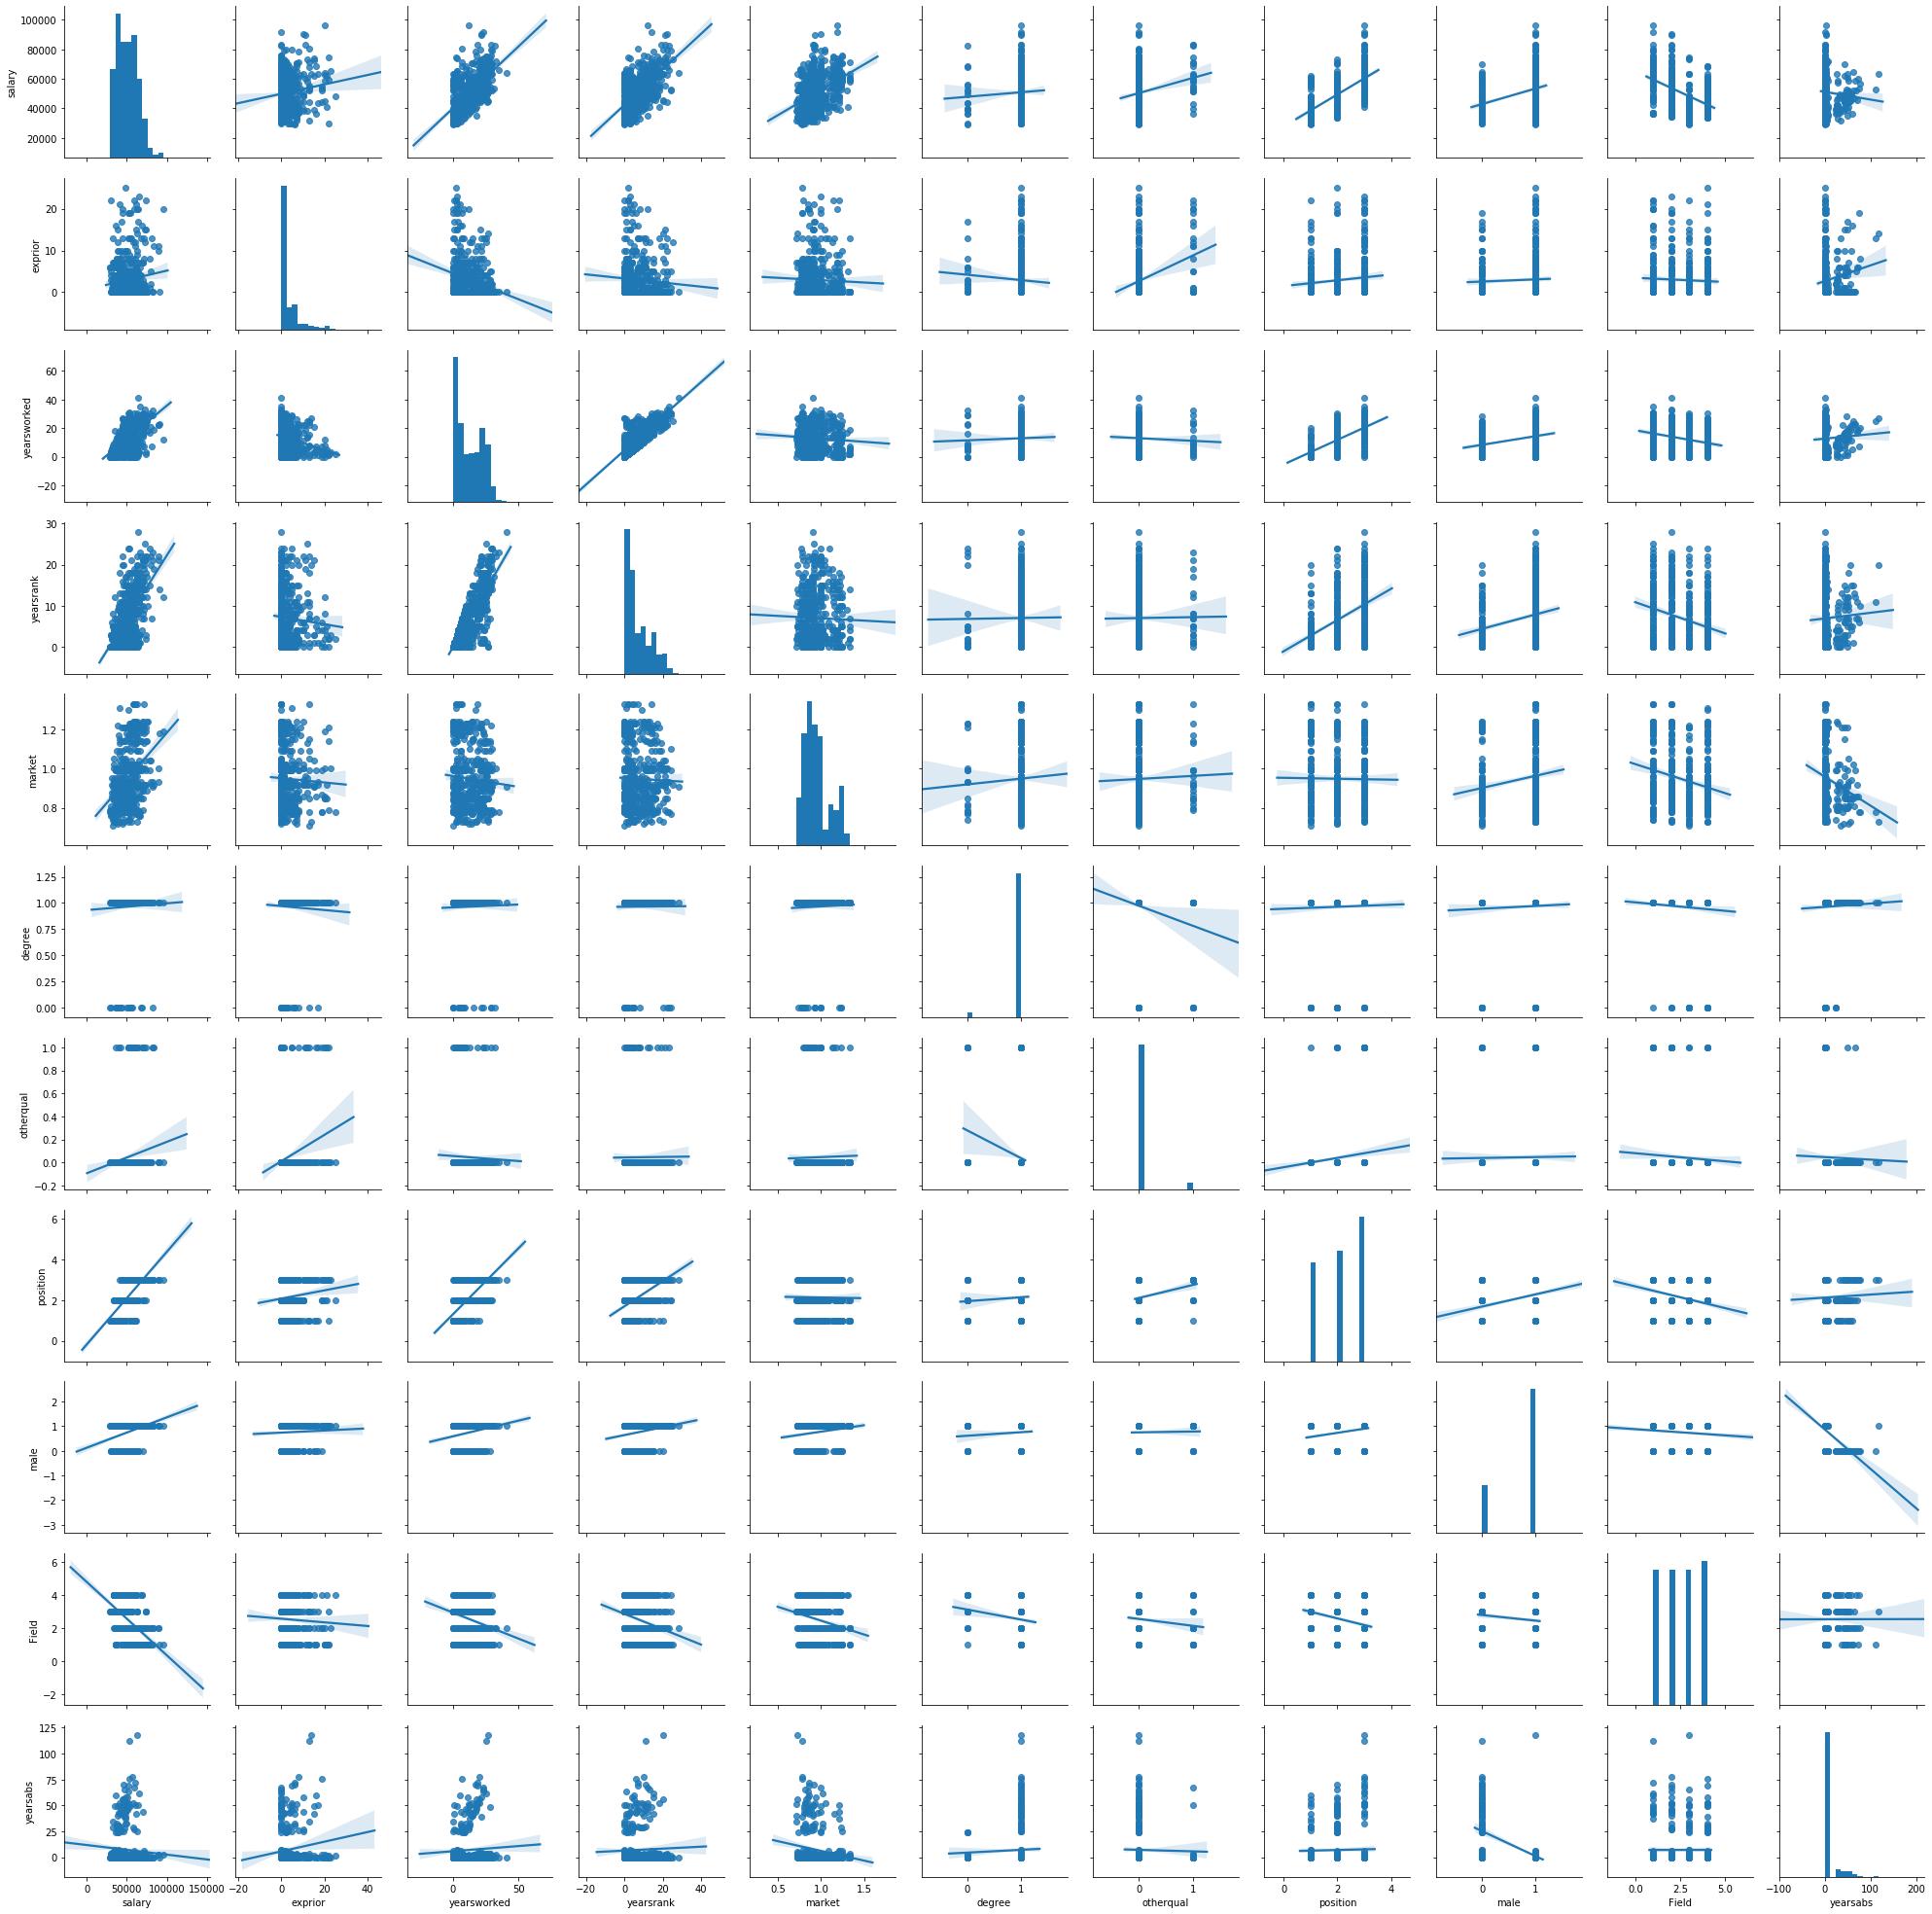

In [7]:
import seaborn as sns
#---------------------------------

sns.pairplot(salary, kind = 'reg')

- The variables in this dataset appear to have more than just linear relationships, however for the purpose of this study, i will only focus on the linear relations, with salary as the target variable.
- Salary, yearsranked, yearsworked,male, market and position appear to be having a positive linear relationship with each other 
- Field also shows a negative linear correlation with salary
- Taking Salary as a target variable, yearksworked and years ranked shows a positive linear correlation, which demonstrates multicolinearity

#### Computing correlation of data elements with salary

In [8]:
import scipy.stats as stats
#-----------------------------

corr = salary.corr()
corr.head(1)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.0,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.06963


Features with a strong correlation (greater than 0.59) to salary are as follows:

- Years Worked
- Years rank
- Position

### Validate the effect of the correlation of the above features

- with significance test using p-value

### Hypothesis Testing  

- Null Hypothesis   -  the correlation between salary and years worked, years ranked and position has no significance

     
- Alternate Hypothesis - the correlation between salary and years worked, years ranked and position is significant enough to include in my model

In [9]:
print(f'p-value of years worked and salary: {stats.pearsonr(salary.yearsworked, salary.salary)}')
print(f'p-value of years rank and salary: {stats.pearsonr(salary.yearsrank, salary.salary)}')
print(f'p-value of postion and salary: {stats.pearsonr(salary.position, salary.salary)}')

p-value of years worked and salary: (0.6235888657598048, 1.2873351342916404e-56)
p-value of years rank and salary: (0.6107063176375227, 9.307173080331551e-54)
p-value of postion and salary: (0.7021217379212221, 2.164001495311446e-77)


p-value threshold ≤ 0.05

- According to the computed p-value above which is within the threshold for all three variables, i reject the null hypothesis and go on to use years ranked,salary, position and years worked as key features to build my model.

### Checking for  Multicolinearity

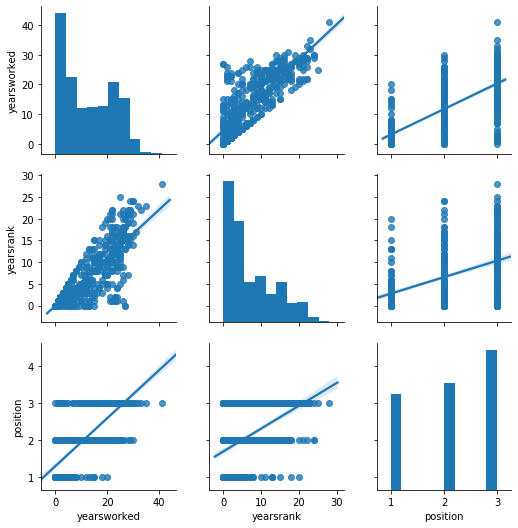

In [10]:
#Selecting data elements of interest 

salary_ = salary[['yearsworked', 'yearsrank', 'position']]

#Visualising for multicolinearity of features

sns.pairplot(salary_ ,kind = "reg");

- there is a linear relationship between years ranked and years worked, which indicates multicolinearity

###  Validating multicolinearity by:

- Variance Inflation Factor (VIF)
- hypothesis testing using p-value

#### Variance Inflation Factor (VIF)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#------------------------------------------------------------------------

VIF = pd.Series([variance_inflation_factor(salary_.values, i) 
               for i in range(salary_.shape[1])], 
              index=salary_.columns)

VIF

yearsworked    13.794682
yearsrank       6.765550
position        6.074470
dtype: float64

A rule of thumb for interpreting the variance inflation factor:

- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.
-------------------------------------------------------------------------

- The VIF for years worked, years ranked  and position are high to very high therefore indicating multicolinearity
- Years rank and position show to be having a strong correlation with each other

#### Hypothesis Testing  to validate the significance of the multicolinearity detacted

- Null Hypothesis - the multicolinearity is not significant


- Alternate Hypothesis - the multicolinearity is significant

In [12]:
print(f'p-values between years-worked and years-rank: {stats.pearsonr(salary.yearsworked, salary.yearsrank)}')
print(f'p-values between postion and years-worked: {stats.pearsonr(salary.position, salary.yearsworked)}')
print(f'p-values between years-rank and position: {stats.pearsonr(salary.yearsrank, salary.position)}')


p-values between years-worked and years-rank: (0.8134557540055777, 2.3444736582811158e-122)
p-values between postion and years-worked: (0.7463112666910761, 2.1625240174381035e-92)
p-values between years-rank and position: (0.4848908290210395, 1.3103248811040993e-31)


p-value threshold ≤ 0.05

- According to the computed p-value above which are within the threshold for all three variables, i reject the null hypothesis and go on to conclude that the multicolinearity of the features is significant.


- So what do i then do when the variables with the highest significant correlation with my target variable is multicolinear ? 
- I will procceed to use them nonetheless since i dont have proof that this can negatively affect the performance of my model

### 3. Feature engineering 

Constructing relevant features from existing data to train a machine learning
model.

In [13]:
# Get dummy variables for Field and Position

dummies_df   =  pd.get_dummies(salary.Field)
dummies2_df  =  pd.get_dummies(salary.position)

#Renaming the Field and Position columns according to the description dataframe df1

dummies_df.rename(columns  = {1: 'Engineering', 2: 'Finance', 3:'Human Resources', 4:'Marketing'}, inplace=True)
dummies2_df.rename(columns = {1: 'Junior_Employee', 2: 'Manager', 3:'Executive'}, inplace=True)

# Combine the main dataframe with the dummy variables
# and exclude the Field and Position columns

mvr_df = pd.concat([salary,dummies_df,dummies2_df], axis=1)
mvr_df.drop(['position','Field'], axis = 1, inplace = True)
mvr_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,male,yearsabs,Engineering,Finance,Human Resources,Marketing,Junior_Employee,Manager,Executive
0,53000.0,0,0,0,1.17,1,0,1,0,0,0,1,0,1,0,0
1,58000.0,1,0,0,1.24,1,0,1,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,2,0,0,1,0,1,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,0,0,0,1,1,0,0
4,34731.0,0,2,2,0.91,1,0,1,1,0,0,0,1,1,0,0


The dummy variables will help the model to correctly interpret the value of each column

### 4. Model development

#### Splitting the data set to Training and Testing

In [24]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#---------------------------------------------------------

X = salary_
y = salary['salary']

X = sm.add_constant(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = sm.OLS(y_train, x_train).fit()

I decided to split my dataset in a 70:30 ratio for taining:testing respectively, since given the size of the dataset, this is the most appropriate ratio to use.

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     187.3
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           8.56e-73
Time:                        14:24:29   Log-Likelihood:                -3734.9
No. Observations:                 359   AIC:                             7478.
Df Residuals:                     355   BIC:                             7493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.706e+04   1257.575     21.517      0.000    2.46e+04    2.95e+04
yearsworked  -437.6557    111.898     -3.911      0.000    -657.723    -217.588
yearsrank    1153.8842    128.179      9.002      0.000     901.799    1405.969
position     1.005e+04    817.593     12.293      0.000    8442.471    1.17e+04
==============================================================================
Omnibus:                       40.246   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.528
Skew:                           0.896   Prob(JB):                     1.07e-11
Kurtosis:                       3.410   Cond. No.                         61.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the model above:

- 64.40% of the variation in salary is due to years worked, years ranked and position
- the Dublin-Watson score of 1.914 indicates no autocorrelation among the key features/sample

In [16]:
# model coefficients
model.params

const          27059.311751
yearsworked     -437.655658
yearsrank       1153.884227
position       10050.405903
dtype: float64

#### Compute and standardise residuals and predicted values

In [17]:
#Create residuals
residual  = model.resid

#Fit linear model to dataset
results   = model.fittedvalues

#create instance of influence
influence = model.get_influence()

#leverage (hat values)
leverage  = influence.hat_matrix_diag

#Cook's D values (and p-values) as tuple of arrays
cooks_d   = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals  = influence.resid_studentized_external

In [18]:
#Representing residuals and fitted values in a table

resid_n_fitted = {'Residual': residual, 'Standard_residual':studentized_residuals, 'Predicted Salary': results, 'Actual Salary' :y_train}


resid_n_fitted = pd.DataFrame(resid_n_fitted)

resid_n_fitted.head()

,Residual,Standard_residual,Predicted Salary,Actual Salary
121,-37.332453,-0.004653,48115.332453,48078.0
372,529.992651,0.066403,62543.007349,63073.0
469,1644.310949,0.206573,46420.689051,48065.0
340,2014.714360,0.251908,64731.285640,66746.0
447,-7148.646746,-0.892631,45966.646746,38818.0


#### Visualising Residuals and Predicted Salary of trainset

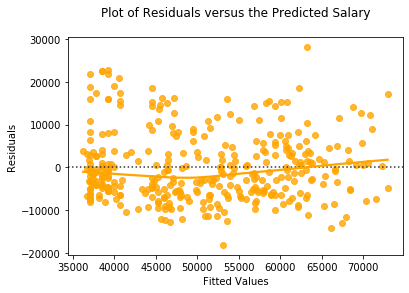

In [19]:
import matplotlib.pyplot as plt
#----------------------------------------------------

sns.residplot(x = results, y = residual, lowess=True, color='orange')

plt.title('Plot of Residuals versus the Predicted Salary\n')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals');

- Looking at the dispersion of the points on the residual plot above, I suspect that there may be homoscedasticity in the model, implying that the model accounts for most of the variation of salary

#### Visualising studentized residuals

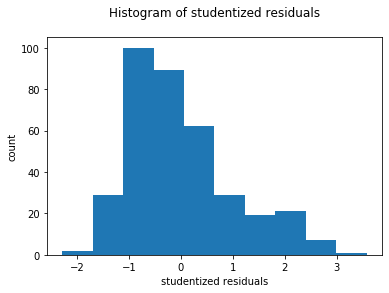

In [20]:
#Plotting Histogram
plt.hist(studentized_residuals)

plt.title('Histogram of studentized residuals\n')
plt.xlabel('studentized residuals')
plt.ylabel('count');

The studentized residuals is skewed more to the right

In [21]:
# import statsmodels.api as sm 
# import pylab as py 
# #-------------------------------------------

# sm.qqplot(studentized_residuals, line ='45') 
# py.title('ggplot of studentized residuals\n')
# py.show()

### 5. Predictions

In [22]:
#Run model on the test set

X_test           = sm.add_constant(x_test)
test_prediction  = model.predict(x_test)
train_prediction = model.predict(x_train)

#### Model quality check

In [23]:
from statsmodels.tools.eval_measures import rmse
#--------------------------------------------------

train_rmse = rmse(y_train, train_prediction)
test_rmse  = rmse(y_test, test_prediction)
diffrence  = test_rmse- train_rmse

print(f'Train rmse: {train_rmse}')
print(f'Test rmse: {test_rmse}')
print(f'The difference between train and test: {diffrence}')

Train rmse: 7979.61878609009
Test rmse: 7846.9251908015085
The difference between train and test: -132.6935952885815


In [25]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

statsmodels==0.10.1
seaborn==0.9.0
scipy==1.4.1
scikit-learn==0.21.3
pandas==0.25.3
matplotlib==3.1.1


The RMSE scores show no signs of overfitting or underfitting. The test is higer than the train values which makes sense as the model should be more accurate in predicting values it has already seen in the training set.

The model seems to be a good model since it has satisfied the following linear regression assumptions:

- Linear relationship
- Multivariate normality
- No multicollinearity
- No auto-correlation
- Homoscedasticity

## 6. Insights



The accuracy of the model has proved that Years Worked, Years Ranked and Position are strong predictors for employee's salary

### Reference 

- https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.OLSInfluence.summary_frame.html

- https://www.displayr.com/variance-inflation-factors-vifs/

- https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/